In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [6]:
pokemon_df = pd.read_csv("pokemon.csv")
combats_df = pd.read_csv("combats.csv")


In [7]:
pokemon_df.loc[pokemon_df['#'] == 62, 'Name'] = 'Primeape'
pokemon_df['Type 2'].fillna("None", inplace=True)


C:\Users\Rony\AppData\Local\Temp\ipykernel_48364\261672592.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemon_df['Type 2'].fillna("None", inplace=True)


In [8]:
win_counts = combats_df['Winner'].value_counts()
battle_counts = pd.concat([combats_df['First_pokemon'], combats_df['Second_pokemon']]).value_counts()
win_percentage = (win_counts / battle_counts).fillna(0)
pokemon_df['Win Percentage'] = pokemon_df['#'].map(win_percentage).fillna(0)

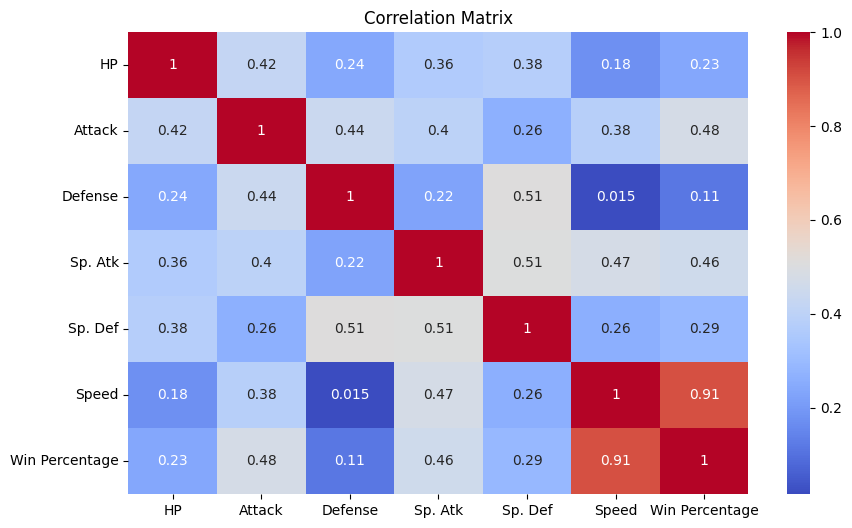

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

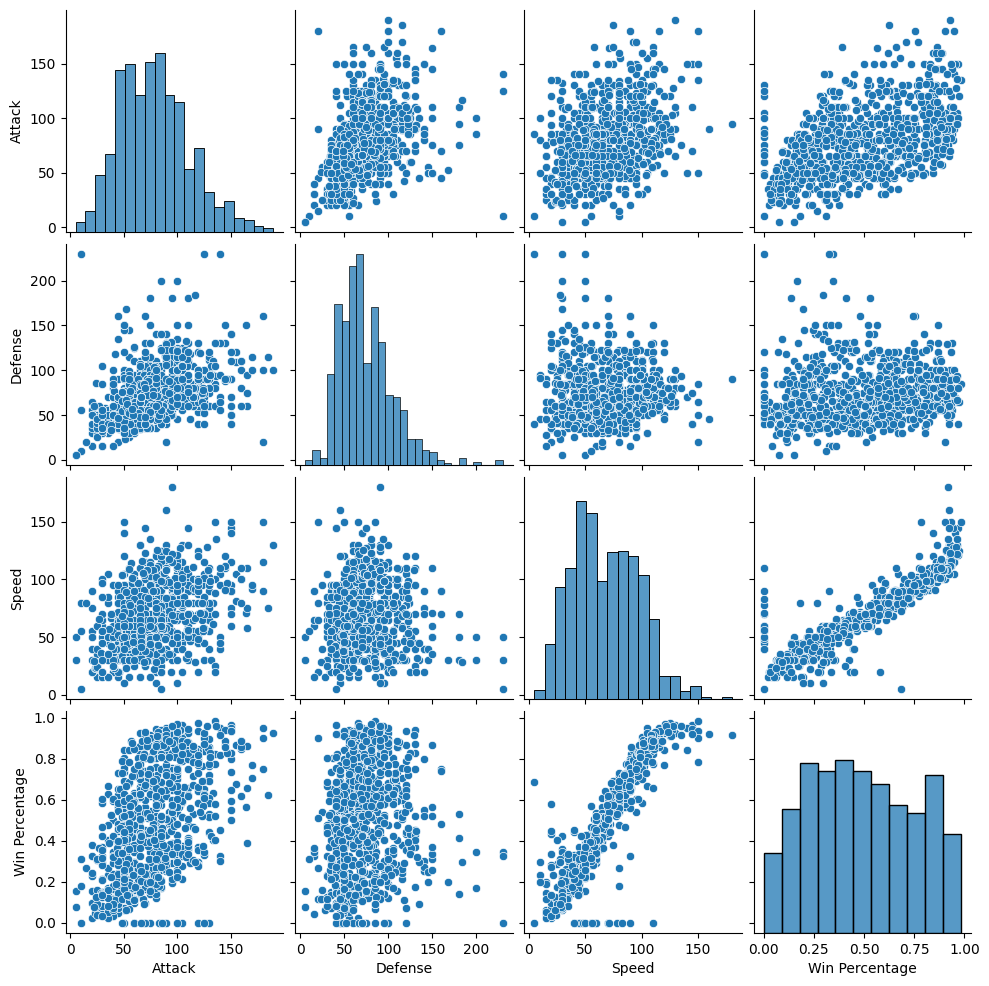

In [10]:
sns.pairplot(pokemon_df[['Attack', 'Defense', 'Speed', 'Win Percentage']])
plt.show()


In [11]:
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = pokemon_df[features]
y = pokemon_df['Win Percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    results[name] = mae
    print(f"{name} MAE: {mae:.4f}")


Linear Regression MAE: 0.0649
Random Forest MAE: 0.0579
XGBoost MAE: 0.0645


In [13]:
best_model = min(results, key=results.get)
print(f"Best model: {best_model} with MAE of {results[best_model]:.4f}")

Best model: Random Forest with MAE of 0.0579
